<a href="https://colab.research.google.com/github/hyulianton/jejaringsosial/blob/master/js_Implementasi_Python_Murni_Model_Watts%E2%80%93Strogatz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Implementasi Python Murni Model Watts–Strogatz (WS)

Model WS mensimulasikan mekanisme Small-World: dimulai dari keteraturan yang kental (klaster tinggi) dan menambahkan elemen acak kecil (*shortcuts*).

### Block 1: Setup dan Definisi Parameter

Kita definisikan parameter dasar Model WS: $n$ (simpul), $k$ (tetangga terdekat), dan $p$ (probabilitas *rewiring*).

In [1]:
# Import library yang dibutuhkan
import numpy as np
import random
import matplotlib.pyplot as plt

# --- Parameter Model WS ---
# [n] Jumlah simpul (nodes) dalam jaringan
n = 20

# [k] Jumlah tetangga terdekat yang dihubungkan di awal (harus genap)
# Setiap simpul terhubung ke k/2 simpul di kiri dan k/2 simpul di kanan.
k = 4

# [p] Probabilitas rewiring (p kecil = Small-World)
# Kita ambil p = 0.1, hanya 10% sisi yang diacak.
p = 0.1

print(f"Membuat graf WS G(n={n}, k={k}, p={p})")

Membuat graf WS G(n=20, k=4, p=0.1)


### Block 2: Konstruksi Graf Cincin Reguler Awal

Tahap 1: Membuat Matriks *Adjacency* untuk graf cincin teratur. Di sini $C$ (klaster) tinggi, dan $L$ (jarak) panjang.

In [3]:
# Inisialisasi matriks Adjacency (A) n x n dengan nilai nol
A = np.zeros((n, n), dtype=int)

# --- Tahap 1: Graf Cincin Reguler ---
# Setiap simpul i dihubungkan ke k/2 tetangga terdekat di kedua sisi.
# Kita iterasi untuk simpul i dari 0 hingga n-1
for i in range(n):
    # Iterasi untuk k/2 simpul berikutnya (tetangga terdekat)
    for delta in range(1, k // 2 + 1):

        # Hitung indeks simpul tetangga j (menggunakan operasi modulo % untuk efek cincin)
        # Jarak ke kanan: j_kanan
        j_kanan = (i + delta) % n

        # Jarak ke kiri: j_kiri
        j_kiri = (i - delta) % n

        # Tetapkan koneksi (sisi) untuk graf tak berarah
        A[i, j_kanan] = 1
        A[j_kanan, i] = 1
        A[i, j_kiri] = 1
        A[j_kiri, i] = 1

print("Matriks Adjacency Graf Cincin Awal:\n", A)

Matriks Adjacency Graf Cincin Awal:
 [[0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1]
 [1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1]
 [1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0]]


### Block 3: Proses Rewiring Probabilistik

Tahap 2: Menerapkan probabilitas $p$ untuk memutus sisi lokal dan menyambungkannya ke simpul acak (membuat *shortcuts*).

In [4]:
# --- Tahap 2: Proses Rewiring ---

# Kita hanya perlu memeriksa sisi di atas diagonal (i < j) untuk menghindari pengulangan.
for i in range(n):
    for delta in range(1, k // 2 + 1):
        # Simpul target awal (j)
        j = (i + delta) % n

        # Cek apakah sisi A[i, j] akan di-rewire (random.random() < p)
        if random.random() < p:

            # --- 1. Putus Sisi Lama ---
            # Hapus koneksi lokal A[i, j] dan A[j, i]
            A[i, j] = 0
            A[j, i] = 0

            # --- 2. Sambung Sisi Baru (Rewire) ---

            # Pilih simpul baru t secara acak (Random Uniform)
            # Pastikan t != i dan t belum terhubung ke i
            while True:
                t = random.randint(0, n - 1)
                # Kriteria: t bukan simpul i, dan belum ada koneksi (A[i, t] == 0)
                if t != i and A[i, t] == 0:
                    break

            # Tetapkan koneksi baru (shortcut)
            A[i, t] = 1
            A[t, i] = 1

print("\n--- Hasil Akhir Generasi Graf WS ---")
print(f"Matriks Adjacency WS G(20, 4, 0.1) yang Terbentuk (Simpul 0-9): \n{A[:10, :10]}")


--- Hasil Akhir Generasi Graf WS ---
Matriks Adjacency WS G(20, 4, 0.1) yang Terbentuk (Simpul 0-9): 
[[0 1 1 0 0 0 0 0 0 0]
 [1 0 1 1 0 0 0 0 0 0]
 [1 1 0 1 1 0 0 0 0 0]
 [0 1 1 0 0 1 0 0 0 0]
 [0 0 1 0 0 1 1 0 0 0]
 [0 0 0 1 1 0 1 1 0 0]
 [0 0 0 0 1 1 0 1 0 1]
 [0 0 0 0 0 1 1 0 1 1]
 [0 0 0 0 0 0 0 1 0 1]
 [0 0 0 0 0 0 1 1 1 0]]


### Block 4: Visualisasi Graf yang Dihasilkan (Code & Markdown)

Kita gunakan Matplotlib untuk memvisualisasikan hasil akhir, yang kini harus menunjukkan **keseimbangan** antara garis lokal (teratur) dan garis acak (*shortcuts*).

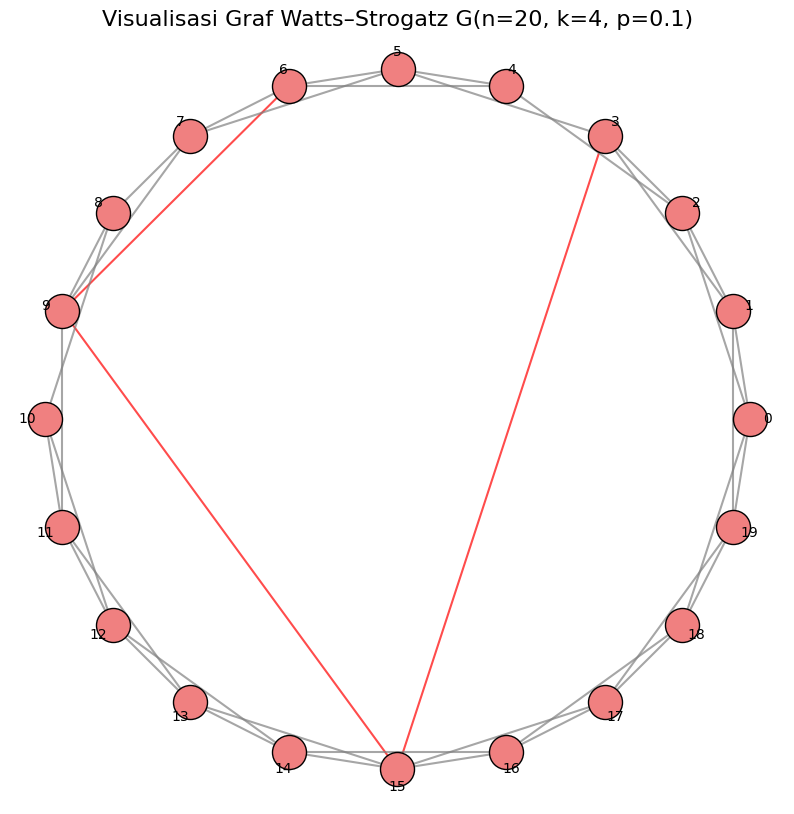

In [5]:
# Import kembali matplotlib.pyplot untuk visualisasi
import matplotlib.pyplot as plt

# --- Setup Posisi Simpul (Circular Layout) ---
# Tata letak lingkaran memudahkan melihat sifat cincin awal.
sudut = np.linspace(0, 2 * np.pi, n, endpoint=False)
posisi_x = np.cos(sudut)
posisi_y = np.sin(sudut)
posisi_simpul = np.array([posisi_x, posisi_y]).T

# --- Pengaturan Plot ---
plt.figure(figsize=(10, 10))
plt.title(f"Visualisasi Graf Watts–Strogatz G(n={n}, k={k}, p={p})", fontsize=16)

# 1. Gambar Sisi (Edges)
for i in range(n):
    for j in range(i + 1, n):
        if A[i, j] == 1:
            x_coords = [posisi_simpul[i, 0], posisi_simpul[j, 0]]
            y_coords = [posisi_simpul[i, 1], posisi_simpul[j, 1]]

            # Bedakan warna sisi lokal vs shortcut untuk analisis visual yang lebih baik
            # Asumsi: Jika jarak asli > k/2, itu kemungkinan besar shortcut
            jarak_asli = min(abs(i - j), n - abs(i - j))

            if jarak_asli > k // 2 and p > 0:
                # Sisi yang melintasi lingkaran (kemungkinan besar hasil rewiring)
                warna = 'red'
                z = 0
            else:
                # Sisi lokal (kemungkinan besar sisa dari cincin teratur)
                warna = 'gray'
                z = 1

            plt.plot(x_coords, y_coords,
                     color=warna,
                     alpha=0.7,
                     linestyle='-',
                     linewidth=1.5,
                     zorder=z)

# 2. Gambar Simpul (Nodes)
plt.scatter(posisi_simpul[:, 0], posisi_simpul[:, 1],
            s=600,
            c='lightcoral',
            edgecolors='black',
            zorder=3)

# Tambahkan label ID simpul
for i in range(n):
    plt.text(posisi_simpul[i, 0] * 1.05, posisi_simpul[i, 1] * 1.05, str(i),
             color='black', fontsize=10, ha='center', va='center')

# Bersihkan sumbu
plt.axis('off')
plt.show()

#### ✍️ **Keterangan Tambahan untuk Mahasiswa:**

Jika Anda menjalankan kode ini, Anda akan mengamati:

  * **Mayoritas Sisi Lokal (Abu-abu)**: Ini menunjukkan $C$ (klaster) tetap tinggi karena sebagian besar koneksi terdekat dipertahankan ($1-p$).
  * **Beberapa Sisi Jarak Jauh (Merah)**: Ini adalah *shortcuts* yang diciptakan oleh proses *rewiring* ($p$). Sisi inilah yang secara drastis menurunkan $L$ (jarak) di jaringan, menciptakan efek **Small-World**\!

Eksperimen ini secara visual membuktikan bahwa dengan *p* kecil, kita dapat memiliki yang terbaik dari kedua dunia.
